In [150]:
# import libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

data_train=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")


In [151]:
#show sample data and datatype
#print(data_train.head(5))
print(data_train.sample(5))


     PassengerId  Survived  Pclass  \
861          862         0       2   
744          745         1       3   
702          703         0       3   
192          193         1       3   
855          856         1       3   

                                                Name     Sex   Age  SibSp  \
861                      Giles, Mr. Frederick Edward    male  21.0      1   
744                               Stranden, Mr. Juho    male  31.0      0   
702                            Barbara, Miss. Saiide  female  18.0      0   
192  Andersen-Jensen, Miss. Carla Christine Nielsine  female  19.0      1   
855                       Aks, Mrs. Sam (Leah Rosen)  female  18.0      0   

     Parch             Ticket     Fare Cabin Embarked  
861      0              28134  11.5000   NaN        S  
744      0  STON/O 2. 3101288   7.9250   NaN        S  
702      1               2691  14.4542   NaN        C  
192      0             350046   7.8542   NaN        S  
855      1             39209

In [152]:
print(data_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [153]:
## so Age,Cabin,Embarked columns contains some null value
# 5 features are integer, 2 float, 5 features are string
print(data_train['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


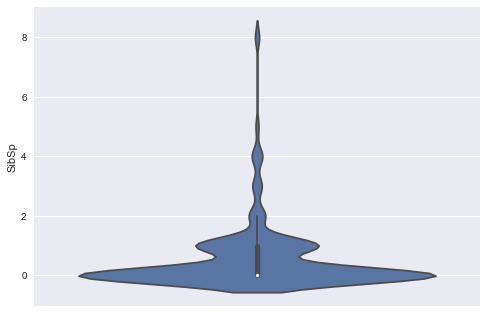

In [154]:
print(data_train.describe())
#38% survived
#75% traveller doesnot have sibling or spouse
#
sns.violinplot(y='SibSp',data=data_train)
plt.show()

In [155]:
#check catagorigal variables
data_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Weir, Col. John",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [156]:
# check corelation
pd.crosstab(index=data_train['Survived'],columns=data_train['Pclass'],margins=True)

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [157]:
pd.crosstab(index=data_train['Survived'],columns=data_train['Sex'],margins=True)

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [158]:
pd.crosstab(index=data_train['Survived'],columns=data_train['Parch'],margins=True)

Parch,0,1,2,3,4,5,6,All
Survived,,,,,,,,
0,445,53,40,2,4,4,1,549
1,233,65,40,3,0,1,0,342
All,678,118,80,5,4,5,1,891


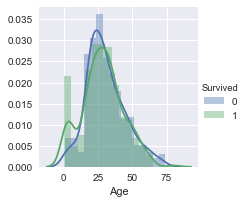

In [159]:
#visualize data with survived and Age
g=sns.FacetGrid(data_train,hue="Survived")
g.map(sns.distplot,"Age").add_legend()
plt.show()
#infant survived

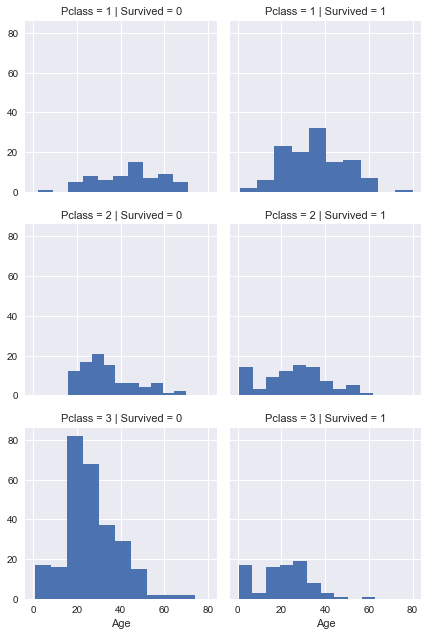

In [160]:
#consider Pclass and visualize
g=sns.FacetGrid(data_train,col="Survived",row="Pclass")
g.map(plt.hist,"Age").add_legend()
plt.show()

In [161]:
# data wranglling
#drop some variable
data_train = data_train.drop(['Ticket', 'Cabin'], axis=1)
data_test = data_test.drop(['Ticket', 'Cabin'], axis=1)

In [162]:
%%capture
#supress this printing
#print(data_train.head(5))
# few new feature extraction can be done
#create new feature like Title of a person
def gettitle(name):
    if '.' in name:
        s=name.split(',')[1].split('.')[0].strip()
    else:
        s="Unknown"
    print(s)    
    if (s=='Master'):
       s1=1
    elif (s in ['Ms','Mlle','Miss']):
       s1=2
    elif (s in ['Mme','Mrs']):
       s1=3
    elif (s=='Mr'):
       s1=4
    else:
        s1=5
    
    return s1

data_train['title']=data_train['Name'].apply(gettitle);
data_test['title']=data_test['Name'].apply(gettitle);


In [163]:
pd.crosstab(index=data_train['Survived'],columns=data_train['title'],margins=True)

title,1,2,3,4,5,All
Survived,,,,,,
0,17,55,26,436,15,549
1,23,130,100,81,8,342
All,40,185,126,517,23,891


In [164]:
#also drop other columns
data_train = data_train.drop(['Name', 'PassengerId'], axis=1)
data_test = data_test.drop(['Name', 'PassengerId'], axis=1)


In [165]:
%%capture
print(data_train.head(5))
#convert catagorical to numerical
def convertsex(sex):
  if sex=='male':
    return 1
  else:
    return 0
data_train['Sex']=data_train['Sex'].apply(convertsex)
data_test['Sex']=data_train['Sex'].apply(convertsex)

In [166]:
print(data_train.head(5))

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  title
0         0       3    1  22.0      1      0   7.2500        S      4
1         1       1    0  38.0      1      0  71.2833        C      3
2         1       3    0  26.0      0      0   7.9250        S      2
3         1       1    0  35.0      1      0  53.1000        S      3
4         0       3    1  35.0      0      0   8.0500        S      4


In [167]:
# handle missing data
#for catagorical mill missing values with most common
data_train["Embarked"] = data_train["Embarked"].fillna("S")

# impute age by pclass
data_train['Age'] = data_train.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))
data_test['Age'] = data_test.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

#only for test fare is imputed
data_test['Fare'] = data_test.groupby(['title'])['Fare'].transform(lambda x: x.fillna(x.mean()))

In [168]:
#create new feature by combining all family members
print(data_train.head(4))
def family(a):
    return a[1]+a[4]+1
data_train['family']=data_train.apply(family,axis=1)
print(data_train.head(4))


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  title
0         0       3    1  22.0      1      0   7.2500        S      4
1         1       1    0  38.0      1      0  71.2833        C      3
2         1       3    0  26.0      0      0   7.9250        S      2
3         1       1    0  35.0      1      0  53.1000        S      3
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  title  family
0         0       3    1  22.0      1      0   7.2500        S      4       5
1         1       1    0  38.0      1      0  71.2833        C      3       3
2         1       3    0  26.0      0      0   7.9250        S      2       4
3         1       1    0  35.0      1      0  53.1000        S      3       3


In [169]:
print(data_test.head(4))
def family(a):
    return a[0]+a[3]+1

data_test['family']=data_test.apply(family,axis=1)
data_train.head()

   Pclass  Sex   Age  SibSp  Parch    Fare Embarked  title
0       3    0  34.5      0      0  7.8292        Q      4
1       3    0  47.0      1      0  7.0000        S      3
2       2    0  62.0      0      0  9.6875        Q      4
3       3    0  27.0      0      0  8.6625        S      4


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,family
0,0,3,1,22.0,1,0,7.2500,S,4,5
1,1,1,0,38.0,1,0,71.2833,C,3,3
2,1,3,0,26.0,0,0,7.9250,S,2,4
3,1,1,0,35.0,1,0,53.1000,S,3,3
4,0,3,1,35.0,0,0,8.0500,S,4,4


In [170]:
#convert Embart to numerical
def embark(a):
    if a=='S':
        return 1
    else:
        return 2
    
data_train['Embarked']=data_train['Embarked'].apply(embark)
data_test['Embarked']=data_test['Embarked'].apply(embark)

    

In [171]:
data_train.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
title       891 non-null int64
family      891 non-null int64
dtypes: float64(2), int64(8)
memory usage: 69.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null int64
title       418 non-null int64
family      418 non-null int64
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


In [172]:
#now create model
X_train = data_train.drop("Survived", axis=1)
y_train = data_train["Survived"]
X_test  = data_test.copy()
print(X_train.shape)
print(y_train.shape)
X_test.info()

(891, 9)
(891,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null int64
title       418 non-null int64
family      418 non-null int64
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


In [173]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

81.709999999999994